In [1]:
import pandas as pd
import numpy as np

In [2]:
! ls ../data/glove

cooccurrence.bin      corpus.txt            vectors.txt
cooccurrence.shuf.bin vectors.bin           vocab.txt


In [3]:
word_arr = []
word_to_arr = {}

with open("../data/glove/vectors.txt") as f:
    lines = f.readlines()
    for line in lines:
        word = line.split()[0]
        word_arr.append(word)
        arr = [float(s) for s in line.split()[1:]]
        word_to_arr[word] = arr

In [4]:
word_arr

['bruh',
 'UNKNOWN',
 's__Faecalibacterium_prausnitzii',
 's__Bacteroides_uniformis',
 's__Bacteroides_vulgatus',
 's__Blautia_wexlerae',
 's__Fusicatenibacter_saccharivorans',
 's__Parabacteroides_distasonis',
 's__Anaerostipes_hadrus',
 's__Agathobaculum_butyriciproducens',
 's__Dorea_longicatena',
 's__Roseburia_inulinivorans',
 's__Bacteroides_ovatus',
 's__Dorea_formicigenerans',
 's__Eubacterium_hallii',
 's__Blautia_obeum',
 's__Collinsella_aerofaciens',
 's__Bacteroides_thetaiotaomicron',
 's__Ruthenibacterium_lactatiformans',
 's__Roseburia_faecis',
 's__Flavonifractor_plautii',
 's__Eubacterium_eligens',
 's__Coprococcus_comes',
 's__Alistipes_putredinis',
 's__Ruminococcus_torques',
 's__Gemmiger_formicilis',
 's__Odoribacter_splanchnicus',
 's__Roseburia_hominis',
 's__Streptococcus_salivarius',
 's__Bifidobacterium_longum',
 's__Escherichia_coli',
 's__Bacteroides_xylanisolvens',
 's__Alistipes_finegoldii',
 's__Parabacteroides_merdae',
 's__Bacteroides_caccae',
 's__Roseb

In [5]:
word = "s__Lactobacillus_acidophilus"
a = np.array(word_to_arr[word])
best_match = None
best_score = 424242
for w in word_arr:
    if w == word or w == "UNKNOWN" or w == "bruh": continue
    b = np.array(word_to_arr[w])
    score = np.linalg.norm(a - b)
    if score < best_score:
        best_score = score
        best_match = w
print(best_match)
print(best_score)

s__Bifidobacterium_animalis
3.579614545969021


In [6]:
W = np.array([word_to_arr[w] for w in word_arr[2:-1]])
W.shape

(885, 500)

In [7]:
W_norm = np.divide(W, np.linalg.norm(W, axis=1, keepdims=True))

In [8]:
np.linalg.norm(W_norm[0, :])

0.9999999999999999

In [9]:
from utils import get_species, get_labels, get_labels_all

In [10]:
X, y, y_all = get_species(), get_labels(), get_labels_all()
X = X[list(filter(lambda x : "virus" not in x and "unclassified" not in x, X.columns))]
weights = ((y_all == "T2D") | (y_all == "Obesity") | (y_all == "Overweight") | (y_all == "Underweight")).values
X_red, y_red = X.iloc[~weights, :], y.iloc[~weights, :]

In [11]:
X_red.shape

(9661, 1392)

In [12]:
X_red_renamed = X_red.copy()
X_red_renamed.columns = list(map(lambda x : x.split("|")[-1], X_red.columns))
X_red_renamed

s__Methanobrevibacter_smithii  \
Study_ID Sample Accession                                  
GMHI-23  SAMEA3879547                           0.008611   
         SAMEA3879551                           0.000000   
         SAMEA3879543                           0.001520   
         SAMEA3879565                           0.003630   
         SAMEA3879546                           0.000012   
...                                                  ...   
P140     SAMN07509557                           0.000000   
         SAMN07509558                           0.000000   
         SAMN07509546                           0.000000   
         SAMN07509552                           0.000000   
         SAMN07509921                           0.000000   

                           s__Methanosphaera_stadtmanae  \
Study_ID Sample Accession                                 
GMHI-23  SAMEA3879547                               0.0   
         SAMEA3879551                               0.0   
         SAMEA3879543                               0.0   
         SAMEA3879565                               0.0   
         SAMEA3879546                               0.0   
...                                                 ...   
P140     SAMN07509557                               0.0   
         SAMN07509558                               0.0   
         SAMN07509546                               0.0   
         SAMN07509552                               0.0   
         SAMN07509921                               0.0   

                           s__Candidatus_Methanomassiliicoccus_intestinalis  \
Study_ID Sample Accession                                                     
GMHI-23  SAMEA3879547                                                   0.0   
         SAMEA3879551                                                   0.0   
         SAMEA3879543                                                   0.0   
         SAMEA3879565                                                   0.0   
         SAMEA3879546                                                   0.0   
...                                                                     ...   
P140     SAMN07509557                                                   0.0   
         SAMN07509558                                                   0.0   
         SAMN07509546                                                   0.0   
         SAMN07509552                                                   0.0   
         SAMN07509921                                                   0.0   

                           s__Actinobaculum_sp_oral_taxon_183  \
Study_ID Sample Accession                                       
GMHI-23  SAMEA3879547                                     0.0   
         SAMEA3879551                                     0.0   
         SAMEA3879543                                     0.0   
         SAMEA3879565                                     0.0   
         SAMEA3879546                                     0.0   
...                                                       ...   
P140     SAMN07509557                                     0.0   
         SAMN07509558                                     0.0   
         SAMN07509546                                     0.0   
         SAMN07509552                                     0.0   
         SAMN07509921                                     0.0   

                           s__Actinomyces_cardiffensis  \
Study_ID Sample Accession                                
GMHI-23  SAMEA3879547                              0.0   
         SAMEA3879551                              0.0   
         SAMEA3879543                              0.0   
         SAMEA3879565                              0.0   
         SAMEA3879546                              0.0   
...                                                ...   
P140     SAMN07509557                              0.0   
         SAMN07509558                              0.0   
         SAMN07509546   

In [13]:
X_red_words = X_red_renamed[word_arr[2:-1]]
X_red_words

s__Faecalibacterium_prausnitzii  \
Study_ID Sample Accession                                    
GMHI-23  SAMEA3879547                             0.034479   
         SAMEA3879551                             0.005993   
         SAMEA3879543                             0.016352   
         SAMEA3879565                             0.008305   
         SAMEA3879546                             0.062820   
...                                                    ...   
P140     SAMN07509557                             0.027177   
         SAMN07509558                             0.000000   
         SAMN07509546                             0.011268   
         SAMN07509552                             0.054568   
         SAMN07509921                             0.055720   

                           s__Bacteroides_uniformis  s__Bacteroides_vulgatus  \
Study_ID Sample Accession                                                      
GMHI-23  SAMEA3879547                      0.004675                 0.024085   
         SAMEA3879551                      0.093155                 0.103573   
         SAMEA3879543                      0.008362                 0.000000   
         SAMEA3879565                      0.038140                 0.062775   
         SAMEA3879546                      0.002241                 0.002160   
...                                             ...                      ...   
P140     SAMN07509557                      0.101408                 0.255836   
         SAMN07509558                      0.000000                 0.000000   
         SAMN07509546                      0.003544                 0.005898   
         SAMN07509552                      0.243696                 0.000000   
         SAMN07509921                      0.058667                 0.195307   

                           s__Blautia_wexlerae  \
Study_ID Sample Accession                        
GMHI-23  SAMEA3879547                 0.000039   
         SAMEA3879551                 0.002266   
         SAMEA3879543                 0.001599   
         SAMEA3879565                 0.000042   
         SAMEA3879546                 0.000000   
...                                        ...   
P140     SAMN07509557                 0.000348   
         SAMN07509558                 0.000000   
         SAMN07509546                 0.000000   
         SAMN07509552                 0.000000   
         SAMN07509921                 0.002366   

                           s__Fusicatenibacter_saccharivorans  \
Study_ID Sample Accession                                       
GMHI-23  SAMEA3879547                                0.009575   
         SAMEA3879551                                0.016986   
         SAMEA3879543                                0.006626   
         SAMEA3879565                                0.002428   
         SAMEA3879546                                0.004046   
...                                                       ...   
P140     SAMN07509557                                0.000000   
         SAMN07509558                                0.000000   
         SAMN07509546                                0.000017   
         SAMN07509552                                0.001063   
         SAMN07509921                                0.000422   

                           s__Parabacteroides_distasonis  \
Study_ID Sample Accession                                  
GMHI-23  SAMEA3879547                           0.001004   
         SAMEA3879551                           0.009807   
         SAMEA3879543                           0.005636   
         SAMEA3879565                           0.001476   
         SAMEA3879546                           0.000277   
...                                                  ...   
P140     SAMN07509557                           0.046902   
         SAMN07509558                           0.000000   
         SAMN07509546                           0.002919   
         SAMN07509552 

In [24]:
c = 0.00001

num_microbes = np.sum((X_red_words > c).values, axis=1, keepdims=True)

weighted_sum = (X_red_words > c) @ W_norm

# features = np.divide(weighted_sum.values, num_microbes)
features

array([[ 0.0074464 , -0.01950927, -0.00131679, ...,  0.04346755,
        -0.03066626, -0.02373929],
       [ 0.00680064, -0.02929966,  0.00980529, ...,  0.0499874 ,
        -0.02824317, -0.01112791],
       [ 0.00588956, -0.02637633,  0.01075412, ...,  0.05059187,
        -0.03243586, -0.01191852],
       ...,
       [ 0.01255076, -0.02563724,  0.02433957, ...,  0.05870016,
        -0.01344165, -0.00366959],
       [ 0.00806499, -0.02680093,  0.00961223, ...,  0.05570777,
        -0.01685271, -0.00538862],
       [ 0.00803936, -0.02979112,  0.0121055 , ...,  0.05085445,
        -0.03127957, -0.00736494]])

In [25]:
features.shape

(9661, 500)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, y_red, test_size=0.2, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
X_train_scaled = s.fit_transform(X_train)
X_test_scaled = s.transform(X_test)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,
          1.,   2.,   1.,   1.,   5.,  12.,   8.,  14.,  23.,  34.,  42.,
         53.,  77.,  82., 117., 146., 177., 237., 266., 300., 358., 355.,
        435., 407., 455., 433., 433., 461., 427., 380., 343., 310., 286.,
        251., 199., 177., 112.,  88.,  78.,  51.,  28.,  22.,  10.,   9.,
          4.,   3.,   0.,   1.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-8.63139925, -8.48376677, -8.33613429, -8.18850181, -8.04086933,
        -7.89323685, -7.74560437, -7.59797189, -7.45033942, -7.30270694,
        -7.15507446, -7.00744198, -6.8598095 , -6.71217702, -6.56454454,
        -6.41691206, -6.26927958, -6.1216471 , -5.97401462, -5.82638214,
        -5.67874966, -5.53

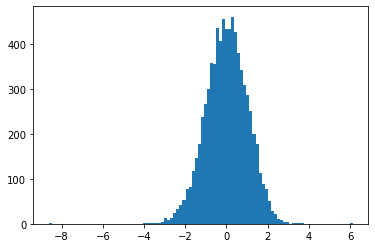

In [28]:
import matplotlib.pyplot as plt

plt.hist(X_train_scaled[:, 2], bins=100)

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, accuracy_score

clf = SVC(random_state=42, C=1, class_weight="balanced")
clf.fit(np.nan_to_num(X_train_scaled), y_train)
y_hat = clf.predict(np.nan_to_num(X_test_scaled))
balanced_accuracy_score(y_test, y_hat), accuracy_score(y_test, y_hat)

/Users/daniel/opt/anaconda3/envs/data/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.7789294193013528, 0.7785825142265907)